In [4]:
from Brownian import *
from common import *

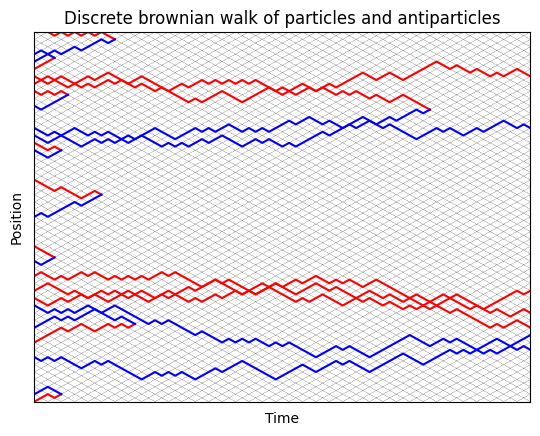

In [3]:
b = Brownian(25, 0.5)
b.plot()

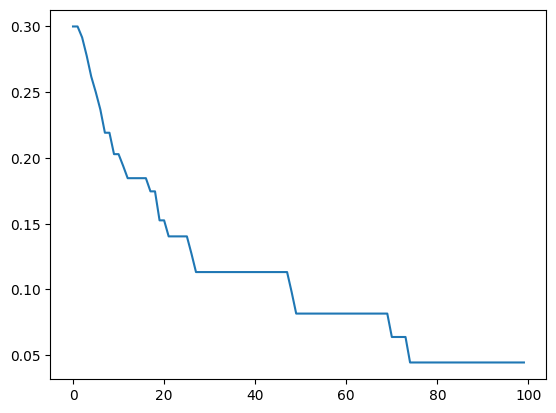

In [5]:
b = Brownian(100, 0.3)
concentration(b)